# Problema 3 - Análisis Datos Youtube - Archivo .py

1. Descargar un archivo .zip mediante código del siguiente url (https://netsg.cs.sfu.ca/youtubedata/) (recomiendo descargar el archivo 0333.zip que es menos pesado)
2. Descomprimir los datos en una carpeta que genere y leer mediante pandas alguno de los archivos en esta. (observar que no es necesario en un primer momento leer los datos con un nombre de columna especifico)

    - Los nombres de columna pueden ser puestos posteriormente
    - El separador de columna es <code>\t</code>
    - Se colocan los nombres de columnas y descripción asociada para su intermetación. Ejemplo columna1 sera VideoID ... 
    

3. Procesar los datos según: 
    - Nos quedaremos con las columnas: VideoID, edad, catgoria, views, rate.
    - Realizar un filtrado básico a los datos. Ejemplo solo seleccionar cierto grupo de categorias

4. Procesamiento en Mongo Db
    - Exportar los datos a mongo DB 
    - Crear 2 graficos con los datos 
    - Compartir link donde encontrar los datos 




| Nombre de la Columna | Descripción                                                                                                 |
|----------------------|-------------------------------------------------------------------------------------------------------------|
| `video ID`           | Una cadena de 11 dígitos, la cual es única                                                                |
| `uploader`           | Una cadena con el nombre de usuario del cargador del video                                                  |
| `age`                | Un número entero que representa los días transcurridos desde la fecha en que se subió el video hasta el 15 de febrero de 2007 (fecha de creación de YouTube) |
| `category`           | Una cadena que indica la categoría del video elegida por el cargador                                       |
| `length`             | Un número entero que representa la duración del video en minutos                                            |
| `views`              | Un número entero que representa el número de visualizaciones del video                                      |
| `rate`               | Un número flotante que indica la calificación del video                                                      |
| `ratings`            | Un número entero que representa el número de calificaciones recibidas por el video                          |
| `comments`           | Un número entero que indica el número de comentarios en el video                                            |
| `related IDs`        | Hasta 20 cadenas de texto con los IDs de videos relacionados                                                |


In [31]:
#######################################################################
#################################        ##############################
#################################   2    ##############################
#################################        ##############################
#######################################################################

import pandas as pd

# Define los nombres de las columnas para las 29 columnas
columnas = [
    'video ID', 'uploader', 'age', 'category', 'length', 'views', 
    'rate', 'ratings', 'comments','related IDs', 'related ID1', 'related ID2', 'related ID3',
    'related ID4', 'related ID5', 'related ID6', 'related ID7', 'related ID8', 
    'related ID9', 'related ID10', 'related ID11', 'related ID12', 'related ID13',
    'related ID14', 'related ID15', 'related ID16', 'related ID17', 'related ID18', 
    'related ID19'
]

# Lee los archivos .txt especificando el separador y los nombres de columnas
df_texto0 = pd.read_csv("./youtubedata/0303/0.txt", sep="\t", header=None, names=columnas)
df_texto1 = pd.read_csv("./youtubedata/0303/1.txt", sep="\t", header=None, names=columnas)
df_texto2 = pd.read_csv("./youtubedata/0303/2.txt", sep="\t", header=None, names=columnas)
df_texto3 = pd.read_csv("./youtubedata/0303/3.txt", sep="\t", header=None, names=columnas)

# Une todos los DataFrames en uno solo
df_unido = pd.concat([df_texto0, df_texto1, df_texto2, df_texto3], ignore_index=True)
df_unido
# Selecciona columnas específicas
columnas_seleccionadas = ['video ID', 'age', 'category','rate']  # Modifica según las columnas que desees
df_modificado = df_unido[columnas_seleccionadas]
df_modificado

,video ID,age,category,rate
0,SZN1ZIHaSEQ,745.0,Music,3.35
1,1l66lVMNvSM,744.0,Music,2.36
2,ZgwWgl-jYKU,744.0,Music,3.83
3,Sx9Bi3C4rs8,745.0,News & Politics,3.26
4,9EqDhVmPNFs,745.0,Comedy,4.36
...,...,...,...,...
68338,qzkywlbOY-M,625.0,Entertainment,4.58
68339,7fKqGbPq7bw,639.0,News & Politics,0.00
68340,HTpLyVHgjTA,623.0,News & Politics,0.00
68341,1ttiJ_XvNKU,640.0,Music,4.73


In [36]:
#######################################################################
#################################        ##############################
#################################   3    ##############################
#################################        ##############################
#######################################################################
data_unida_filtro1=df_unido.groupby(by=['category']).size().reset_index(name='Contados')
data_unida_filtro1




,category,Contados
0,UNA,728
1,Autos & Vehicles,1032
2,Comedy,7021
3,Entertainment,13725
4,Film & Animation,5285
5,Gadgets & Games,3308
6,Howto & DIY,1074
7,Music,19229
8,News & Politics,2933
9,People & Blogs,5223


In [37]:

data_unida_filtro2 = df_unido.groupby(by=['category'])['rate'].mean().reset_index(name='PromedioRate')
data_unida_filtro2

,category,PromedioRate
0,UNA,4.076703
1,Autos & Vehicles,2.995436
2,Comedy,3.205380
3,Entertainment,3.741129
4,Film & Animation,3.885135
5,Gadgets & Games,3.712727
6,Howto & DIY,3.047961
7,Music,3.907807
8,News & Politics,3.141319
9,People & Blogs,2.943326


In [38]:
!pip install pymongo


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


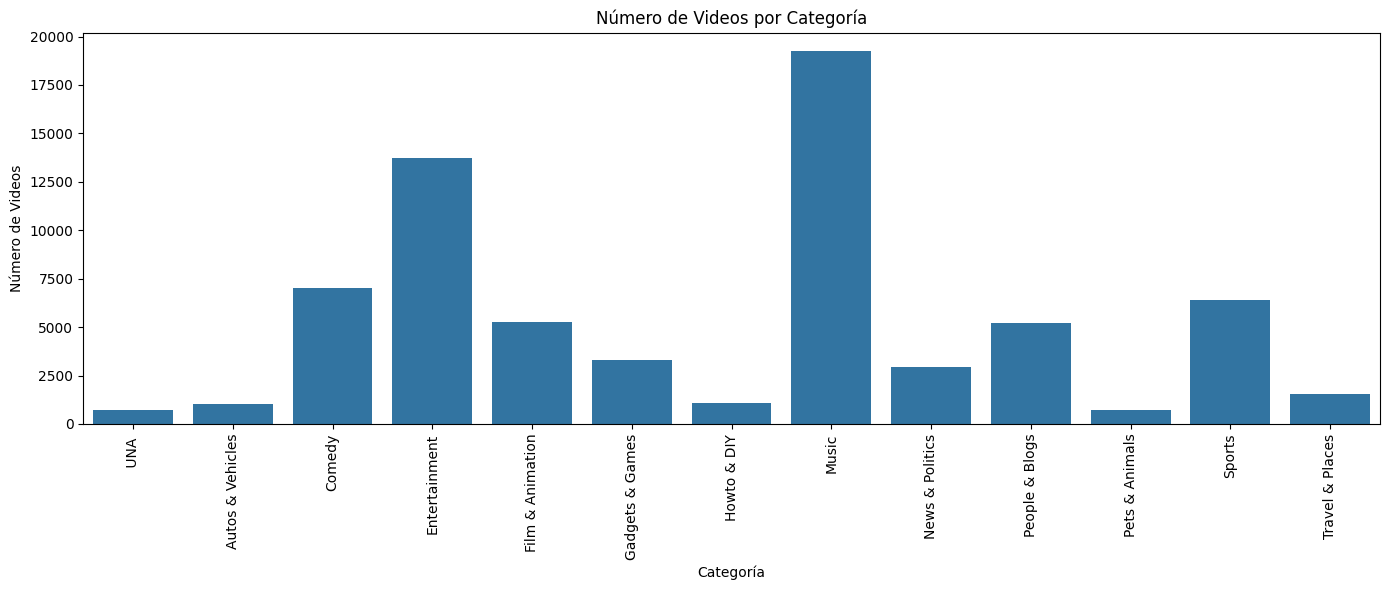

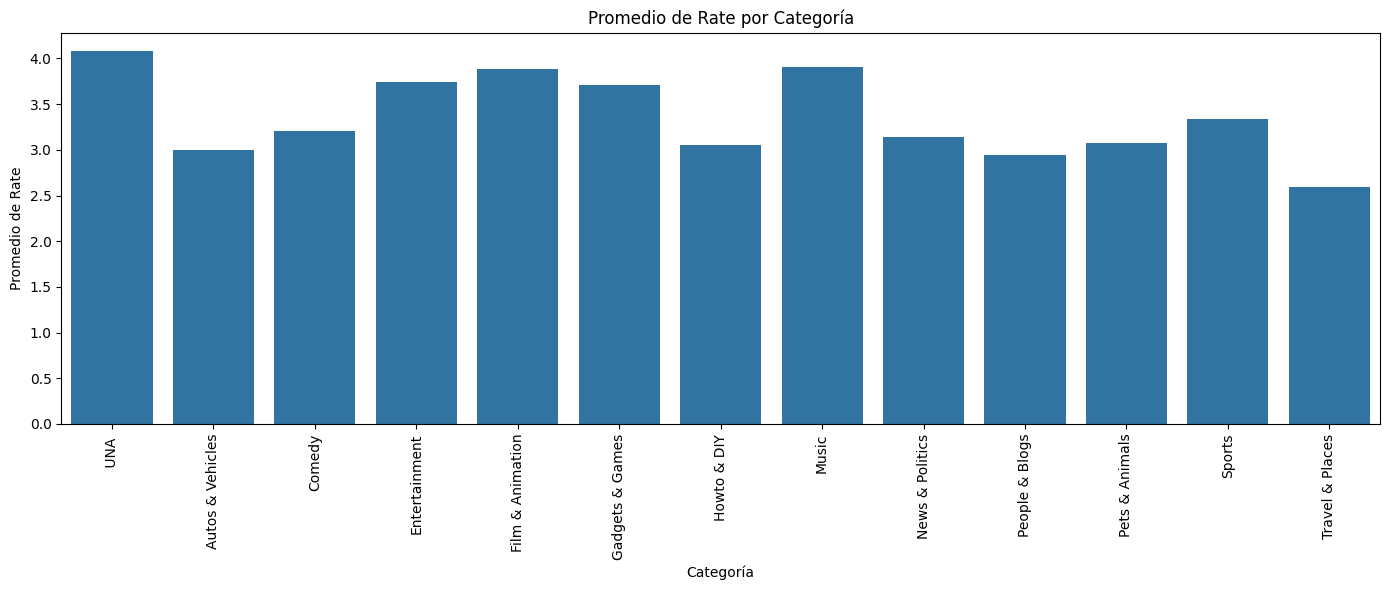

In [40]:

######################################################
###########                                  #########
###########  Crear 2 graficos con los datos  #########
###########                                  #########
######################################################
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el gráfico de número de videos por categoría
plt.figure(figsize=(14, 6))
sns.barplot(x='category', y='Contados', data=data_unida_filtro1)
plt.xticks(rotation=90)
plt.title('Número de Videos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Videos')
plt.tight_layout()
plt.savefig('numero_videos_categoria.png')
plt.show()

# Crear el gráfico del promedio de 'rate' por categoría
plt.figure(figsize=(14, 6))
sns.barplot(x='category', y='PromedioRate', data=data_unida_filtro2)
plt.xticks(rotation=90)
plt.title('Promedio de Rate por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Promedio de Rate')
plt.tight_layout()
plt.savefig('promedio_rate_categoria.png')
plt.show()
